# Curso de Big Data. Otoño 2024
### MOROZUMI _ DE LEÓN _ DI COSTANZO PEREIRA


## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [5]:
import requests

In [8]:
buscar = "whey protein"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

response = requests.request("GET",url)
print (response)
response.text
##Aquí obtendremos la respuesta total de la página API de mercado libre sobre las whey protein 


<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"whey protein","paging":{"total":6428,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1118855020","title":"Suplemento En Polvo Ena Sport  True Made Proteínas Sabor Vanilla Ice Cream En Pote De 930g","condition":"new","thumbnail_id":"957539-MLA50144895276_052022","catalog_product_id":"MLA14287435","listing_type_id":"gold_special","permalink":"https://www.mercadolibre.com.ar/suplemento-en-polvo-ena-sport-true-made-whey-protein-proteinas-sabor-vanilla-ice-cream-en-pote-de-930g/p/MLA14287435","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA3551","domain_id":"MLA-SUPPLEMENTS","thumbnail":"http://http2.mlstatic.com/D_957539-MLA50144895276_052022-I.jpg","currency_id":"ARS","order_backend":1,"price":27560,"original_price":null,"sale_price":null,"available_quantity":100,"official_store_id":null,"use_thumbnail_id":true,"accepts_mercadopago":true,"shipping":{"store_pick_up":false,"free_shipping":true

In [7]:
## Ahora organizaremos los datos para que sea mas fácil de ver
data = response.json()
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'whey protein',
 'paging': {'total': 6428, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1118855020',
   'title': 'Suplemento En Polvo Ena Sport  True Made Proteínas Sabor Vanilla Ice Cream En Pote De 930g',
   'condition': 'new',
   'thumbnail_id': '957539-MLA50144895276_052022',
   'catalog_product_id': 'MLA14287435',
   'listing_type_id': 'gold_special',
   'permalink': 'https://www.mercadolibre.com.ar/suplemento-en-polvo-ena-sport-true-made-whey-protein-proteinas-sabor-vanilla-ice-cream-en-pote-de-930g/p/MLA14287435',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA3551',
   'domain_id': 'MLA-SUPPLEMENTS',
   'thumbnail': 'http://http2.mlstatic.com/D_957539-MLA50144895276_052022-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 27560,
   'original_price': None,
   'sale_price': None,
   'available_quantity': 100,
   'official_store_id': 

 De aquí obtenemos el total de resultados que es de unos 6248 items en su totalidad


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [17]:
import pandas as pd 
## Aquí lo que hacemos es llamar a pandas pd
## Ahora sacaremos los datos de los precios:
precios = data['results']
## Creamos al dataframe a traves de Pandas
df = pd.DataFrame(precios)
## Ahora sacamos el precio mínimo, máximo y por último el promedio.
precio_minimo = df['price'].min()
precio_maximo = df['price'].max()
precio_promedio = df['price'].mean()

print("Precio mínimo:", precio_minimo)
print("Precio máximo:", precio_maximo)
print("Precio promedio:", precio_promedio)

Precio mínimo: 7100.0
Precio máximo: 78719.0
Precio promedio: 27067.998199999998


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

In [21]:
import matplotlib.pyplot as plt


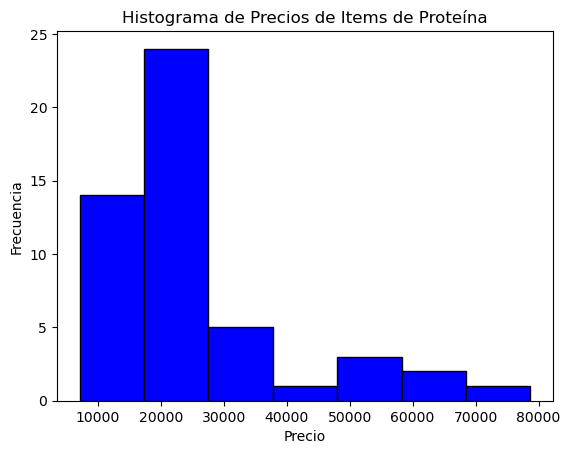

In [26]:
## Para crear un histograma, hacemos el siguiente método:
# Creamos el histogra,a
plt.hist(df['price'], bins=7, color='blue', edgecolor='black')

# Le agregamos detalles al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios de Items de Proteína')

# Mostramos el histograma:
plt.show()

En principio, los outlayers en principio lo que hacen es subir el promedio. El precio de las proteinas en general son de un 27 mil pesos, por ende, todo precio superior a los 50 y inferior a los 11 podrían ser considerados outlayers


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [39]:
import requests

def obtener_productos_por_vendedor_en_categoria(id_vendedor, categoria):
    url = f"https://api.mercadolibre.com/sites/MLA/search?seller_id=355576322&category=MLA409431"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['results']
    else:
        print("Error al realizar la solicitud:", response.status_code)
        return []

def obtener_precio_promedio_por_categoria(productos):
    precio_promedio_por_categoria = {}
    for producto in productos:
        categoria = producto['category_id']
        precio = producto['price']
        if categoria in precio_promedio_por_categoria:
            precio_promedio_por_categoria[categoria]['total'] += precio
            precio_promedio_por_categoria[categoria]['count'] += 1
        else:
            precio_promedio_por_categoria[categoria] = {'total': precio, 'count': 1}
    for categoria, data in precio_promedio_por_categoria.items():
        precio_promedio_por_categoria[categoria]['promedio'] = data['total'] / data['count']
    return precio_promedio_por_categoria

# ID del vendedor y categoría de interés
id_vendedor = "355576322"
categoria = "MLA409431"

# Conseguimos los productos del vendedor en la categoría que queremos
productos = obtener_productos_por_vendedor_en_categoria(355576322, categoria)

# Calculamos el precio promedio por categoría
precio_promedio_por_categoria = obtener_precio_promedio_por_categoria(productos)

# Imprimir el precio promedio por categoría
for categoria, data in precio_promedio_por_categoria.items():
    print(f"Categoría: {categoria}, Precio Promedio: {data['promedio']}")

Categoría: MLA8830, Precio Promedio: 20187.55487804878
Categoría: MLA455048, Precio Promedio: 4783.5
Categoría: MLA95334, Precio Promedio: 14581.865
Categoría: MLA3551, Precio Promedio: 19094.0
Categoría: MLA412710, Precio Promedio: 6266.0
Categoría: MLA455050, Precio Promedio: 1939.99


Aquí obtenemos todos los precios promdios de distintas categorías dentro de los productos, y podemos obtener el precio promedio de cada categoría 

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [77]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://www.lanacion.com.ar/'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

titulos = soup.find_all('h2', class_="text ln-text title --prumo --font-medium --font-m-l")

titulos_extraidos = [titulo.text.strip() for titulo in titulos]

df = pd.DataFrame({'Títulos': titulos_extraidos})

print("Los títulos se cargaron correctamente:")
print(df.head())

nombre_archivo = 'titulos_noticias_corregido.xlsx'
df.to_excel(nombre_archivo, index=False)


Los títulos se cargaron correctamente:
                                             Títulos
0  Los candidatos de Milei. La casta ya no tiene ...
1  El futuro de la Corte Suprema. El Gobierno con...
2  Presionado por la oposición. El Gobierno cambi...
3  “Es brava”. Villarruel habló de su relación co...
4  "¿Alguien cree que el Presidente va a irse?" E...
